<a href="https://colab.research.google.com/github/KishorAlagappan/Task-7-Machine-Learning-/blob/main/SVM_Assignment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [8]:
X=data.drop(columns=['Purchased','User ID'])
Y=data['Purchased']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)


**Feature Scaling**

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting SVM to the Training set**

In [11]:
clf=svm.SVC(kernel='rbf',gamma='scale')
clf.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [12]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [13]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,47,5,52
1,2,26,28
All,49,31,80


**Visualising the Training set results**

In [22]:
training_score = clf.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 90.625


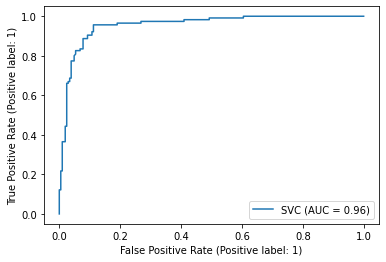

In [21]:
RocCurveDisplay.from_estimator(clf,x_train,y_train)


**Visualising the Test set results**

In [20]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 91.25


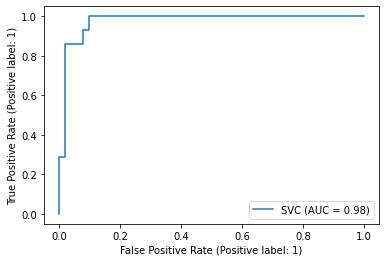

In [19]:
RocCurveDisplay.from_estimator(clf,x_test,y_test)